<!-- # The objective of the assessment is to build a machine learning model to predict the number of retweets a tweets will get using the attached data. Please build your model in python or pyspark.
# 1) Please do some EDA to identify issues with the data, some feature engineering, build a model and provide performance metrics.
# 2) Along with code, justify your model choice and walk us through the EDA and results.
# 3) Implement one REST API to serve your above application


# Be worry of the data, as in the real world, it might not be perfect. It comes from the Twitter API which is pretty well documented if you need any help understanding what the features represent. -->

The objective of the assessment is to build a machine learning model to predict the number of retweets a tweets will get using the attached data. Please build your model in python or pyspark.
1) Please do some EDA to identify issues with the data, some feature engineering, build a model and provide performance metrics.
2) Along with code, justify your model choice and walk us through the EDA and results.
3) Implement one REST API to serve your above application


Be worry of the data, as in the real world, it might not be perfect. It comes from the Twitter API which is pretty well documented if you need any help understanding what the features represent.

In [2]:
import re
import datetime
import string
import collections
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler, RobustScaler

nltk.download('stopwords')

# Set up the NLTK stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Error loading stopwords: <urlopen error [Errno 61]
[nltk_data]     Connection refused>


In [4]:
df = pd.read_excel("sheet.xlsx")


In [5]:
df

,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,...,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber,tweet.place
0,Tue Dec 20 10:57:00 +0000 2016,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,...,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,https://t.co/jghZVBsiQF,http://cjqenterprises.com,6334,6144,1917,Sun Jun 14 22:36:15 +0000 2015,33556,0,NaN
1,Tue Dec 20 10:56:59 +0000 2016,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,...,"Educator of students with special needs, Mothe...",NaN,NaN,154,371,180,Sat Jan 02 13:36:23 +0000 2010,3201,0,NaN
2,Tue Dec 20 10:56:55 +0000 2016,811163466387988480,Seven Questions Before Choosing a Cruise Line ...,False,"<a href=""http://www.google.com/"" rel=""nofollow...",NaN,NaN,NaN,0,0,...,Thrifty Mom Media social media consulting and ...,https://t.co/cEhGzaQJp6,http://www.thriftymommastips.com/,23433,24762,961,Tue May 26 21:26:09 +0000 2009,147958,0,NaN
3,Tue Dec 20 10:56:55 +0000 2016,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",NaN,NaN,NaN,1,0,...,"Adventure travel, yoga, paleo, Crossfit, runni...",https://t.co/3IHwXkgAkA,https://primalsanctuary.com,11136,10081,978,Sat Sep 12 20:29:18 +0000 2015,28988,0,NaN
4,Tue Dec 20 10:56:53 +0000 2016,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,...,I really have got giant ambitions. I start com...,NaN,NaN,55,21,31,Wed Sep 07 16:22:15 +0000 2016,19581,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42363,Tue Dec 20 00:25:13 +0000 2016,811004491378073600,#BusinessInsider Your Money #Travel The Bigges...,False,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",NaN,NaN,NaN,0,0,...,- Owner of - QB Sports and The Judge & Jury - ...,http://t.co/aUs1RvWTzE,http://www.bostonmanor.ca/,537,170,90,Mon Jan 11 00:36:46 +0000 2010,22170,449,NaN
42364,Tue Dec 20 00:25:12 +0000 2016,811004490300223492,.@jessicaparsons @brokegirlsdiary #rockstar #D...,False,"<a href=""http://www.facebook.com/twitter"" rel=...",NaN,NaN,NaN,0,0,...,Talent | Literary | Production,https://t.co/6g3HhXQBkh,https://pro-labs.imdb.com/company/co0499796/,2635,1870,321,Sat Sep 13 19:18:55 +0000 2014,15266,449,NaN
42365,Tue Dec 20 00:25:12 +0000 2016,811004489813495808,"RT @StylishRentals: Love this! ""Dragonfly Dese...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3043,0,...,"udemy instructor, author, marketeer, into tech...",NaN,NaN,91,54,83,Thu Sep 01 23:19:19 +0000 2016,23419,449,NaN
42366,Tue Dec 20 00:25:12 +0000 2016,811004488932737024,"RT @StylishRentals: Love this! ""Dragonfly Dese...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3043,0,...,Keep track of your cryptocurrencies and genera...,NaN,NaN,68,50,63,Fri Sep 02 17:16:12 +0000 2016,20737,449,NaN


In [7]:
df.info()  # Check the data types of the columns and if there are any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42368 entries, 0 to 42367
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TweetPostedTime            42368 non-null  object 
 1   TweetID                    42368 non-null  int64  
 2   TweetBody                  42368 non-null  object 
 3   TweetRetweetFlag           42368 non-null  bool   
 4   TweetSource                42368 non-null  object 
 5   TweetInReplyToStatusID     101 non-null    float64
 6   TweetInReplyToUserID       189 non-null    float64
 7   TweetInReplyToScreenName   189 non-null    object 
 8   TweetRetweetCount          42368 non-null  int64  
 9   TweetFavoritesCount        42368 non-null  int64  
 10  TweetHashtags              42268 non-null  object 
 11  TweetPlaceID               1000 non-null   object 
 12  TweetPlaceName             1000 non-null   object 
 13  TweetPlaceFullName         1000 non-null   obj

##### <span style="color: red;"> Summary :- </span> There were 32 columns and 42,368 entries. It includes various data types such as bool, float64, int64, and object. The DataFrame contains information about tweets, including tweet details, user information, and tweet statistics. Some columns have missing values, such as TweetInReplyToStatusID, TweetInReplyToUserID, and TweetCountry.

In [103]:
df.isnull().sum()

TweetPostedTime                  0
TweetID                          0
TweetBody                        0
TweetRetweetFlag                 0
TweetSource                      0
TweetInReplyToStatusID       42267
TweetInReplyToUserID         42179
TweetInReplyToScreenName     42179
TweetRetweetCount                0
TweetFavoritesCount              0
TweetHashtags                  100
TweetPlaceID                 41368
TweetPlaceName               41368
TweetPlaceFullName           41368
TweetCountry                 41369
TweetPlaceBoundingBox        41368
TweetPlaceAttributes         42368
TweetPlaceContainedWithin    42368
UserID                           0
UserName                         0
UserScreenName                   0
UserLocation                 16019
UserDescription               4364
UserLink                     25769
UserExpandedLink             25806
UserFollowersCount               0
UserFriendsCount                 0
UserListedCount                  0
UserSignupDate      

# EDA

#### TweetPostedTime

In [104]:
df['TweetPostedTime'].head() #  the time when the tweet was posted

0    Tue Dec 20 10:57:00 +0000 2016
1    Tue Dec 20 10:56:59 +0000 2016
2    Tue Dec 20 10:56:55 +0000 2016
3    Tue Dec 20 10:56:55 +0000 2016
4    Tue Dec 20 10:56:53 +0000 2016
Name: TweetPostedTime, dtype: object

##### UserSignupDate

In [105]:
df["UserSignupDate"].head() # the time when the user signed up

0    Sun Jun 14 22:36:15 +0000 2015
1    Sat Jan 02 13:36:23 +0000 2010
2    Tue May 26 21:26:09 +0000 2009
3    Sat Sep 12 20:29:18 +0000 2015
4    Wed Sep 07 16:22:15 +0000 2016
Name: UserSignupDate, dtype: object

In [106]:
# from this feature we can extract the time at which most of the retweet will come.

In [8]:
df['TweetPostedTime'] = [datetime.datetime.strptime(d, '%a %b %d %H:%M:%S %z %Y') for d in df['TweetPostedTime']]
df['UserSignupDate'] = [datetime.datetime.strptime(d, '%a %b %d %H:%M:%S %z %Y') for d in df['UserSignupDate']]

In [9]:
# from this we extract time at which time most retweet cames.
df['TweetPostedTime_hour'] =   [d.hour for d in df['TweetPostedTime']]



In [13]:
df['TweetPostedTime_hour'].value_counts()

6     6567
3     6161
1     5577
8     4896
5     3837
2     3589
9     2668
4     2624
10    2327
7     2303
0     1819
Name: TweetPostedTime_hour, dtype: int64

<AxesSubplot: title={'center': 'TweetPostedTime_hour'}, xlabel='TweetPostedTime_hour', ylabel='Count'>

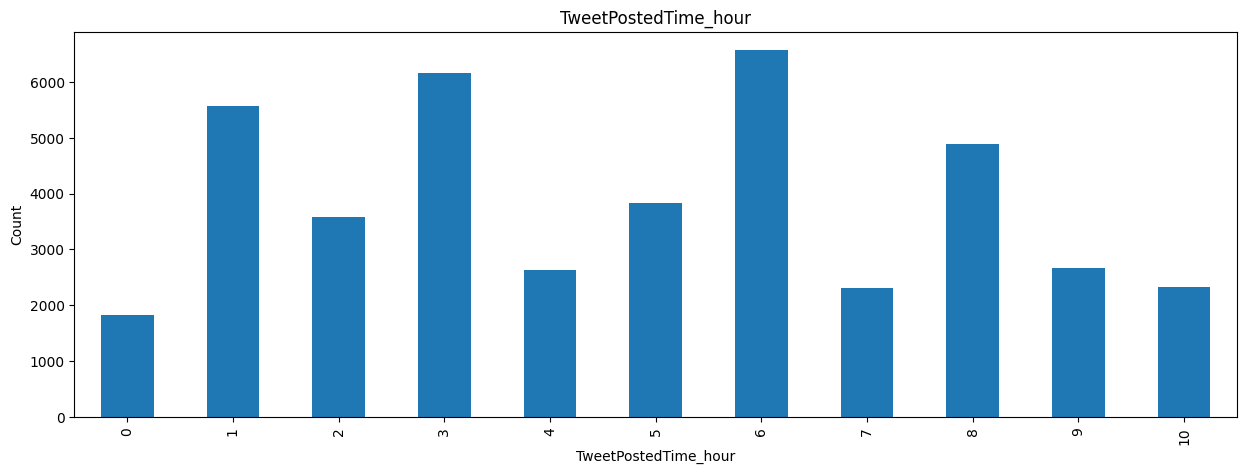

In [12]:
df['TweetPostedTime_hour'].value_counts().sort_index().plot(kind='bar', figsize=(15, 5), title='TweetPostedTime_hour',xlabel='TweetPostedTime_hour', ylabel='Count')

<Axes: ylabel='TweetPostedTime_hour'>

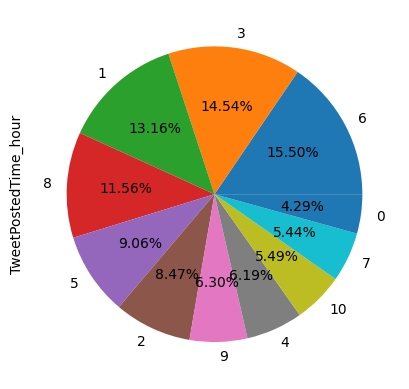

In [109]:
df['TweetPostedTime_hour'].value_counts().plot(kind ="pie",autopct = "%1.2f%%")
# from this we can see that most of the retweet comes at 12:00 am and 1:00 am

In [15]:
#Extracting features from date
df['year_of_signup']=[d.year for d in df['UserSignupDate']]
df['month_of_signup']=[d.month for d in df['UserSignupDate']]



In [16]:

df['year_of_signup'].value_counts()

2016    21068
2015     4101
2009     3555
2012     2799
2014     2741
2011     2560
2010     2459
2013     2125
2008      817
2007      134
2006        9
Name: year_of_signup, dtype: int64

<AxesSubplot: title={'center': 'year_of_signup'}, xlabel='year_of_signup', ylabel='Count'>

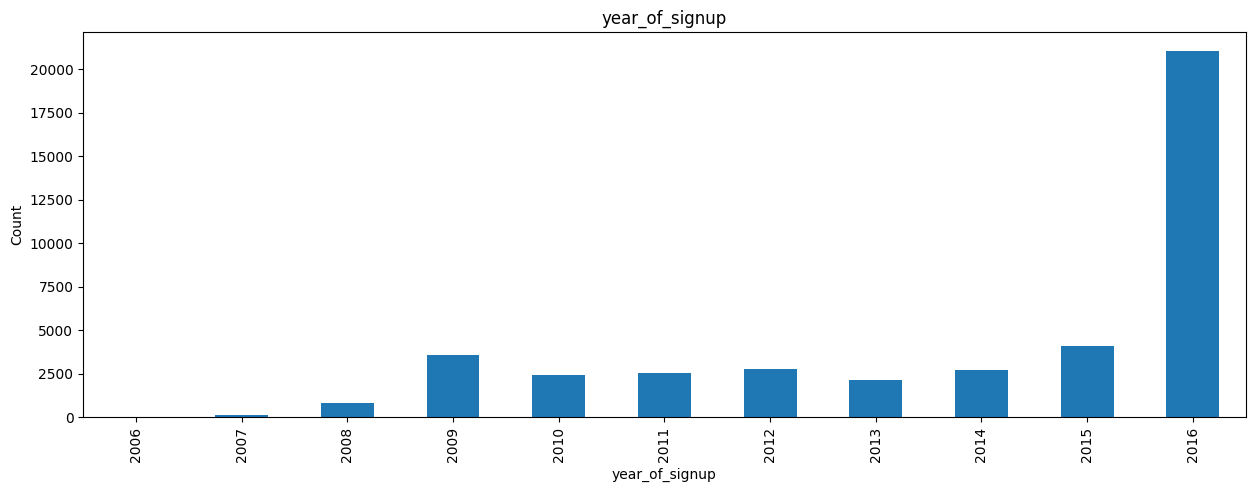

In [21]:
df['year_of_signup'].value_counts().sort_index().plot(kind='bar', figsize=(15, 5), title='year_of_signup',xlabel='year_of_signup', ylabel='Count')

<AxesSubplot: title={'center': 'month_of_signup'}, xlabel='month_of_signup', ylabel='Count'>

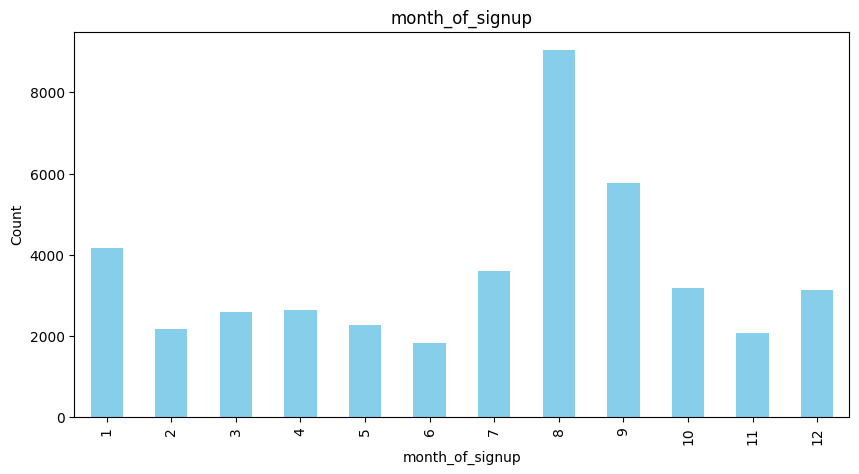

In [20]:
df['month_of_signup'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), title='month_of_signup',xlabel='month_of_signup', ylabel='Count', color='skyblue')

In [23]:

# Derive Total Activity feature
df['Total_Activity'] = df['UserTweetCount'] + df['TweetFavoritesCount']

current_year = datetime.datetime.now()
df['Age'] = current_year.year - df['UserSignupDate'].dt.year

df['Average_Total_Activity_per_year'] = df['Total_Activity'] / df['Age']



In [45]:
sns.barplot(x='Total_Activity_per_year', y='UserID', data=top_10_users, palette='viridis')

# Set the plot title and labels
plt.title('Top 10 Users with Highest Total Activity per Year')
plt.xlabel('Total Activity per Year')
plt.ylabel('UserID')

# Display the plot
plt.show()


ValueError: Could not interpret input 'UserID'

In [113]:
# plot graph in horzontal
count =  df['TweetPostedTime_hour'].value_counts()


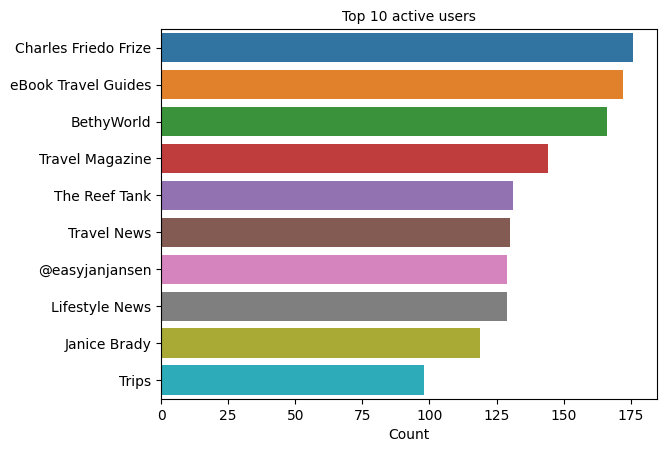

In [114]:
# Analyzing the most active Twitter users
user_count = df['UserName'].value_counts().iloc[:10]
sns.barplot(x=user_count.values, y=user_count.index, orient='h')
plt.title('Top 10 active users', fontsize=10)
plt.xlabel('Count', fontsize=10)
plt.show()

In [115]:
df['UserName']

0          CjQenterprises
1                  monica
2            Paula Schuck
3        Primal Sanctuary
4                     Joe
               ...       
42363       Andy Marcolin
42364    Dedicated Talent
42365     Raphael Cameron
42366            Sky Choi
42367     Brazil Harrison
Name: UserName, Length: 42368, dtype: object

In [116]:
df['month_of_signup']

0        6
1        1
2        5
3        9
4        9
        ..
42363    1
42364    9
42365    9
42366    9
42367    9
Name: month_of_signup, Length: 42368, dtype: int64

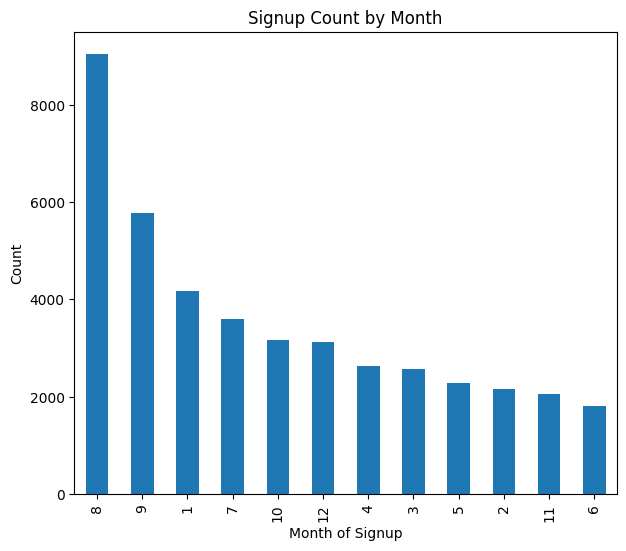

In [117]:
value_counts = df['month_of_signup'].value_counts()

plt.figure(figsize=(7, 6))

value_counts.plot(kind='bar')

plt.xlabel('Month of Signup')
plt.ylabel('Count')
plt.title('Signup Count by Month')

plt.show()

In [118]:
# Analyzing the most active Twitter users
user_count = df['UserName'].iloc[:10]
month_count = df['month_of_signup'].iloc[:10]


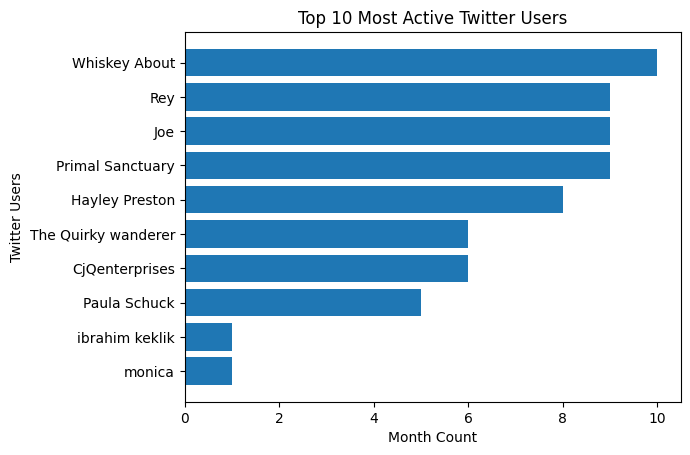

In [119]:
sorted_data = sorted(zip(user_count, month_count), key=lambda x: x[1], reverse=False)
user_count_sorted, month_count_sorted = zip(*sorted_data)

# Plotting the horizontal bar graph
plt.barh(user_count_sorted, month_count_sorted)
plt.xlabel('Month Count')
plt.ylabel('Twitter Users')
plt.title('Top 10 Most Active Twitter Users')
plt.show()


In [120]:
# Users with the maximum number of tweets (target)

User_maxtweet = df[['UserName', 'UserTweetCount']].copy()
User_maxtweet.sort_values(by='UserTweetCount', ascending=False, inplace=True)
User_maxtweet.drop_duplicates(subset='UserName', keep='first', inplace=True)
max_count = User_maxtweet.iloc[:30,:]

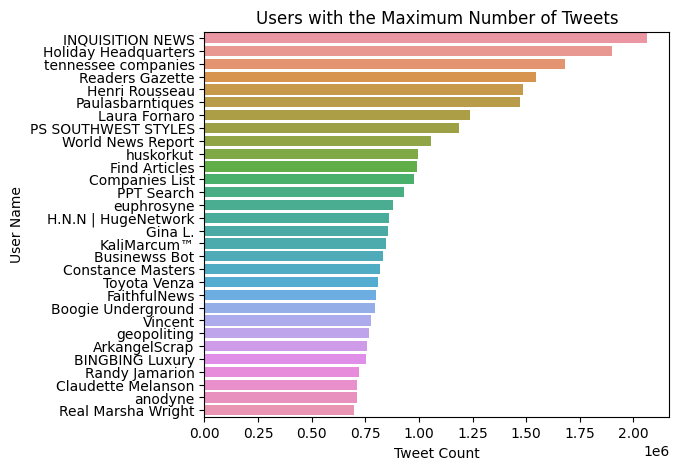

In [121]:
plt.figure(figsize=(6, 5))
sns.barplot(x='UserTweetCount', y='UserName', data=max_count)
plt.title('Users with the Maximum Number of Tweets')
plt.xlabel('Tweet Count')
plt.ylabel('User Name')
plt.show()

In [122]:
# note :- users active how much hr  need plot

In [123]:
## same we have UserFriendsCount,UserFollowersCount

In [124]:
# max userfriends count

Userfrd_max = df[['UserName', 'UserFriendsCount']].copy()
Userfrd_max.sort_values(by='UserFriendsCount', ascending=False, inplace=True)
Userfrd_max.drop_duplicates(subset='UserName', keep='first', inplace=True)
max_count = Userfrd_max.iloc[:20,:]

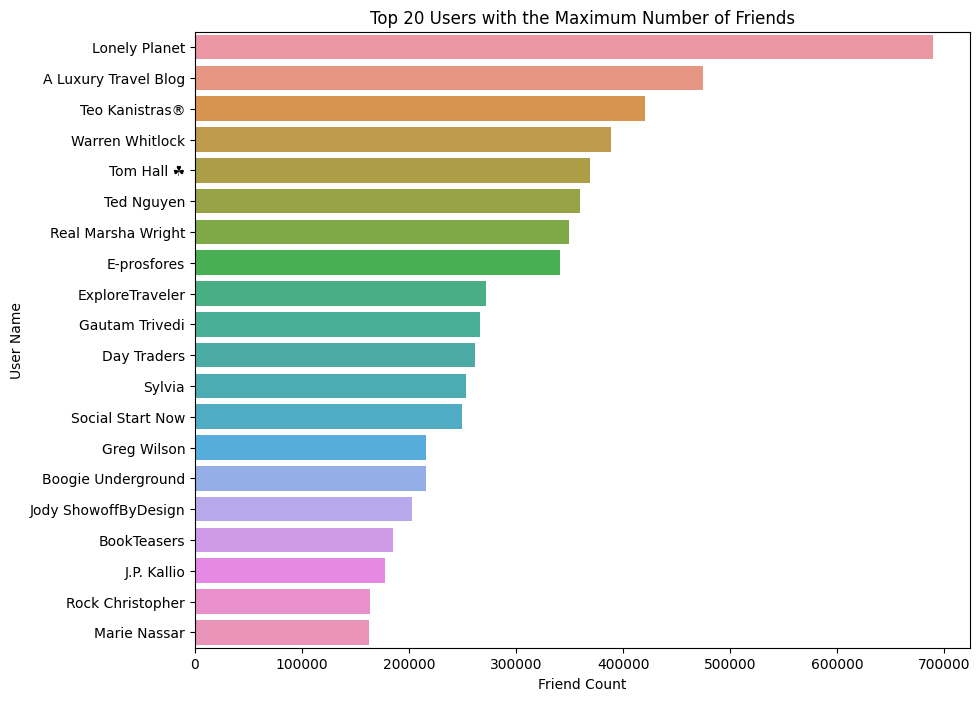

In [125]:
plt.figure(figsize=(10, 8))
sns.barplot(x='UserFriendsCount', y='UserName', data=max_count, orient='h')
plt.title('Top 20 Users with the Maximum Number of Friends')
plt.xlabel('Friend Count')
plt.ylabel('User Name')
plt.show()


<Axes: ylabel='count'>

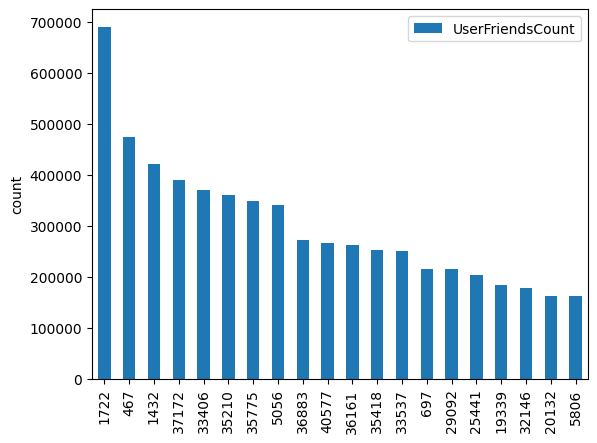

In [126]:
# max UserFollowersCount

Userfollower_max = df[['UserName', 'UserFollowersCount']].copy()
Userfollower_max.sort_values(by='UserFollowersCount', ascending=False, inplace=True)
Userfollower_max.drop_duplicates(subset='UserName', keep='first', inplace=True)
max_count = Userfrd_max.iloc[:20,:]
max_count.plot(kind = 'bar',ylabel="count")

In [127]:
max_count.head()

,UserName,UserFriendsCount
1722,Lonely Planet,689302
467,A Luxury Travel Blog,474612
1432,Teo Kanistras®,420292
37172,Warren Whitlock,389020
33406,Tom Hall ☘,369303


###### tweetbody


In [128]:
# extract mentions and tags from tweet body


In [129]:
df['TweetBody'].head()

0    RT @BeachyMaldives: Local interaction is a gre...
1    RT @TechTerraEd: Need #giftideas for your kid(...
2    Seven Questions Before Choosing a Cruise Line ...
3    RT @CMGsportsclub: Yoga do Brasil, un havre de...
4    RT @StylishRentals: Love this! "Palm Springs M...
Name: TweetBody, dtype: object

In [130]:
df['TweetBody'].loc[3]

'RT @CMGsportsclub: Yoga do Brasil, un havre de paix à l’autre bout du monde https://t.co/h6UNf2tTsa #yoga #bresil #meditation #holiday'

In [131]:
def extract():
    mentions={}
    tags={}
    for i in df.index:
        tokens = df['TweetBody'][i].split()
        for token in tokens:
            if('@' in token[0] and len(token) > 1):
                if token.strip('@') in mentions:
                    mentions[token.strip('@')] += 1
                else:
                    mentions[token.strip('@')] = 1


            if('#' in token[0] and len(token) > 1):
                if token.strip('#') in tags:
                    tags[token.strip('#')] += 1
                else:
                    tags[token.strip('#')] = 1

    return mentions,tags

In [132]:
mentions ,tags = extract()

In [133]:
print(len(mentions),len(tags))

6412 15133


In [134]:
# ploting graph for both mentions and tags with their count

In [135]:
df_mentions = pd.DataFrame()

df_mentions["mentions_key"] =list(mentions.keys())
df_mentions["mentions_values"] = list(mentions.values())


<Axes: xlabel='mentions_values', ylabel='mentions_key'>

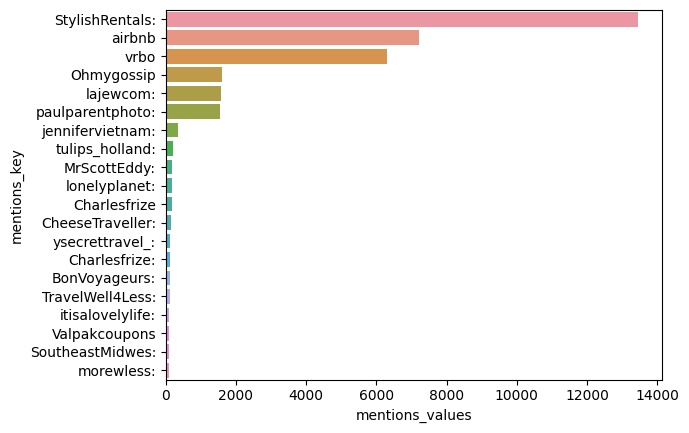

In [136]:
df_mentions.sort_values(ascending=False,by='mentions_values',inplace=True)
count = df_mentions.iloc[:20,:]
sns.barplot(x='mentions_values', y='mentions_key', data=count, orient='h')

In [137]:
df_tags =   pd.DataFrame()

df_tags["tags_key"] =list(mentions.keys())
df_tags["tags_values"] = list(mentions.values())

In [138]:
df_tags.sort_values(ascending=False,by='tags_values',inplace=True)
count = df_tags.iloc[:20,:]
count.head()

,tags_key,tags_values
3,StylishRentals:,13458
4,airbnb,7202
1017,vrbo,6305
1977,Ohmygossip,1588
1976,lajewcom:,1586


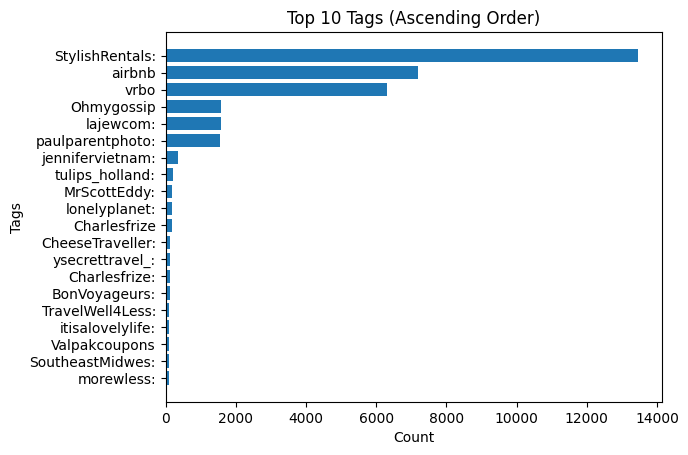

In [139]:

count_sorted = count.sort_values(by='tags_values', ascending=True)

plt.barh(count_sorted["tags_key"], count_sorted["tags_values"])
plt.xlabel("Count")
plt.ylabel("Tags")
plt.title("Top 10 Tags (Ascending Order)")
plt.show()


In [140]:
col_drop = df[['TweetID','TweetSource','TweetPostedTime', 'TweetPlaceID','TweetPlaceAttributes',
       'TweetPlaceContainedWithin', 'UserID','UserDescription','UserLink', 'UserExpandedLink',
        'UserListedCount','tweet.place']]



df_final = df.drop(col_drop,axis = 1)


In [141]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42368 entries, 0 to 42367
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   TweetBody                        42368 non-null  object             
 1   TweetRetweetFlag                 42368 non-null  bool               
 2   TweetInReplyToStatusID           101 non-null    float64            
 3   TweetInReplyToUserID             189 non-null    float64            
 4   TweetInReplyToScreenName         189 non-null    object             
 5   TweetRetweetCount                42368 non-null  int64              
 6   TweetFavoritesCount              42368 non-null  int64              
 7   TweetHashtags                    42268 non-null  object             
 8   TweetPlaceName                   1000 non-null   object             
 9   TweetPlaceFullName               1000 non-null   object             
 10

In [142]:
df_final.isnull().sum()

TweetBody                              0
TweetRetweetFlag                       0
TweetInReplyToStatusID             42267
TweetInReplyToUserID               42179
TweetInReplyToScreenName           42179
TweetRetweetCount                      0
TweetFavoritesCount                    0
TweetHashtags                        100
TweetPlaceName                     41368
TweetPlaceFullName                 41368
TweetCountry                       41369
TweetPlaceBoundingBox              41368
UserName                               0
UserScreenName                         0
UserLocation                       16019
UserFollowersCount                     0
UserFriendsCount                       0
UserSignupDate                         0
UserTweetCount                         0
MacroIterationNumber                   0
TweetPostedTime_hour                   0
year_of_signup                         0
month_of_signup                        0
Total_Activity                         0
Age             

In [143]:
# Dropping columns which are having more than 95%Null Values
null_Cols = ['TweetInReplyToStatusID','TweetInReplyToUserID','TweetInReplyToScreenName','TweetPlaceName',
           'TweetPlaceFullName','TweetCountry','TweetPlaceBoundingBox']
df_final=df_final.drop(null_Cols,axis=1)

In [144]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42368 entries, 0 to 42367
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   TweetBody                        42368 non-null  object             
 1   TweetRetweetFlag                 42368 non-null  bool               
 2   TweetRetweetCount                42368 non-null  int64              
 3   TweetFavoritesCount              42368 non-null  int64              
 4   TweetHashtags                    42268 non-null  object             
 5   UserName                         42368 non-null  object             
 6   UserScreenName                   42368 non-null  object             
 7   UserLocation                     26349 non-null  object             
 8   UserFollowersCount               42368 non-null  int64              
 9   UserFriendsCount                 42368 non-null  int64              
 10

In [145]:
df_final.drop(columns='UserSignupDate',inplace=True,axis=1)

# Feature Engineering


<Axes: >

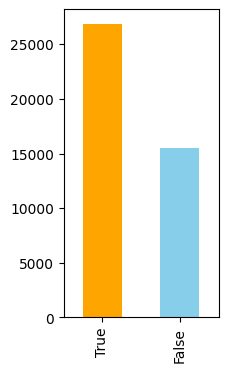

In [146]:
df_final["TweetRetweetFlag"].value_counts().plot(kind ='bar',figsize=(2,4),color = ['orange','skyblue'])

In [147]:
df_final["TweetRetweetFlag"].value_counts()

True     26862
False    15506
Name: TweetRetweetFlag, dtype: int64

In [148]:
df_final["TweetRetweetFlag"].replace({True: 1, False: 0}, inplace=True)


In [149]:
df_final["TweetRetweetFlag"]

0        1
1        1
2        0
3        1
4        1
        ..
42363    0
42364    0
42365    1
42366    1
42367    1
Name: TweetRetweetFlag, Length: 42368, dtype: int64

In [150]:
df_final["UserLocation"].isnull().sum()

16019

In [151]:
 df_final['UserLocation']

0                   United States
1                      durham  nc
2                          Canada
3             Cypress, Texas, USA
4                      Providence
                   ...           
42363    ÜT: 43.484417,-79.720563
42364                 Los Angeles
42365                         NaN
42366                         NaN
42367                         NaN
Name: UserLocation, Length: 42368, dtype: object

In [152]:
df_final.drop(['UserLocation','UserName','UserScreenName'],axis=1,inplace = True)

In [153]:
df_final["TweetBody"].loc[0]

'RT @BeachyMaldives: Local interaction is a great way to gain insight into the Maldivian way of life. #Maldives #vacation #travel https://t.…'

In [154]:
!pip3 install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [155]:
import re
import emoji

def extract_tweet_features(tweet):
    count_words = len(re.findall(r'\w+', tweet))
    count_mentions = len(re.findall(r'@\w+', tweet))
    count_hashtags = len(re.findall(r'#\w+', tweet))
    count_urls = len(re.findall(r'http.?://[^\s]+[\s]?', tweet))
    count_emojis = len(re.findall(r':[a-z_&]+:', emoji.demojize(tweet)))

    return count_words, count_mentions, count_hashtags, count_urls, count_emojis



In [156]:
tweet_features = df_final['TweetBody'].apply(extract_tweet_features)


In [157]:
df_features= pd.DataFrame(list(tweet_features),columns = ['count_words','count_mentions','count_hashtags','count_urls','count_emojis'])

In [158]:
df_features

,count_words,count_mentions,count_hashtags,count_urls,count_emojis
0,22,1,3,1,0
1,27,1,2,0,0
2,13,0,2,1,0
3,23,1,4,1,0
4,21,2,1,1,0
...,...,...,...,...,...
42363,20,0,3,1,0
42364,8,2,6,0,0
42365,20,2,1,1,0
42366,20,2,1,1,0


In [159]:
df_final["TweetBody"].head()

0    RT @BeachyMaldives: Local interaction is a gre...
1    RT @TechTerraEd: Need #giftideas for your kid(...
2    Seven Questions Before Choosing a Cruise Line ...
3    RT @CMGsportsclub: Yoga do Brasil, un havre de...
4    RT @StylishRentals: Love this! "Palm Springs M...
Name: TweetBody, dtype: object

In [160]:
# NLP data preprocessing.

In [161]:


stopwords_list = set(stopwords.words('english'))
porter = PorterStemmer()

def remove_mentions(data):
    return re.sub(r'@\w+', '', data)

def remove_urls(data):
    return re.sub(r'http.?://[^\s]+[\s]?', '', data)

def emoji_oneword(data):
    return data.replace('_', '')

def remove_punctuation(data):
    punct = string.punctuation
    trantab = str.maketrans(punct, len(punct) * ' ')
    return data.translate(trantab)

def remove_digits(data):
    return re.sub(r'\d+', '', data)

def to_lower(data):
    return data.lower()

def remove_stopwords(data):
    words = data.split()
    clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 1]
    return " ".join(clean_words)

def stemming(data):
    words = data.split()
    stemmed_words = [porter.stem(word) for word in words]
    return " ".join(stemmed_words)

def clean_text(data):
    clean_X = df_final[data].apply(remove_mentions).apply(remove_urls).apply(emoji_oneword).apply(remove_punctuation).apply(remove_digits).apply(to_lower).apply(remove_stopwords).apply(stemming)
    return clean_X



In [162]:
df_final["TweetBody"] = df_final["TweetBody"].apply(remove_mentions).apply(remove_urls).apply(emoji_oneword).apply(remove_punctuation).apply(remove_digits).apply(to_lower).apply(remove_stopwords).apply(stemming)


In [163]:
df_final["TweetBody"]

0        rt local interact great way gain insight maldi...
1        rt need giftidea kid read top holiday gift pic...
2              seven question choos cruis line travel ttot
3        rt yoga brasil un havr de paix l’autr bout du ...
4        rt love palm spring mid centuri modern hous re...
                               ...                        
42363    businessinsid money travel biggest mistak peop...
42364     rockstar dedicatedtal actress blogger diy travel
42365    rt love dragonfli desert retreat pool hous ren...
42366    rt love dragonfli desert retreat pool hous ren...
42367    rt love dragonfli desert retreat pool hous ren...
Name: TweetBody, Length: 42368, dtype: object

In [164]:
cv = CountVectorizer()

get = cv.fit_transform(df_final['TweetBody'])

feature_names = cv.get_feature_names_out()


In [165]:

word_freq = dict(zip(feature_names, np.asarray(get.sum(axis=0)).ravel()))

word_counter = pd.DataFrame(word_freq.items(), columns=['word', 'freq'])

word_count = word_counter.sort_values('freq', ascending=False).head(20)




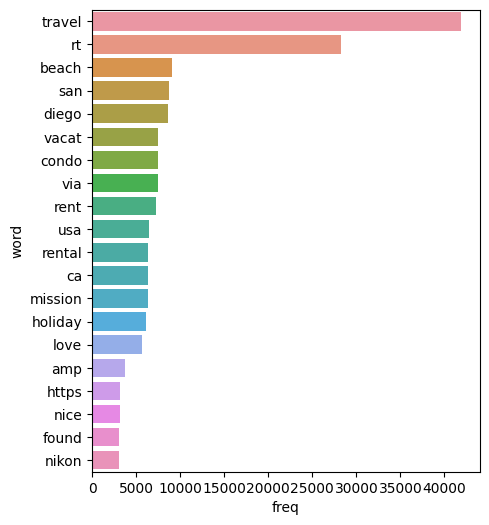

In [166]:
fig, ax = plt.subplots(figsize=(5, 6))
sns.barplot(y="word", x="freq", data=word_count, ax=ax, orient='h')
plt.show()

In [167]:
df_final.drop("TweetHashtags",axis=1,inplace=True)

In [168]:
df_final = pd.concat([df_final,df_features],ignore_index=False,axis=1,)

In [169]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42368 entries, 0 to 42367
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   TweetBody                        42368 non-null  object 
 1   TweetRetweetFlag                 42368 non-null  int64  
 2   TweetRetweetCount                42368 non-null  int64  
 3   TweetFavoritesCount              42368 non-null  int64  
 4   UserFollowersCount               42368 non-null  int64  
 5   UserFriendsCount                 42368 non-null  int64  
 6   UserTweetCount                   42368 non-null  int64  
 7   MacroIterationNumber             42368 non-null  int64  
 8   TweetPostedTime_hour             42368 non-null  int64  
 9   year_of_signup                   42368 non-null  int64  
 10  month_of_signup                  42368 non-null  int64  
 11  Total_Activity                   42368 non-null  int64  
 12  Age               

In [170]:
df_final["TweetBody"]

0        rt local interact great way gain insight maldi...
1        rt need giftidea kid read top holiday gift pic...
2              seven question choos cruis line travel ttot
3        rt yoga brasil un havr de paix l’autr bout du ...
4        rt love palm spring mid centuri modern hous re...
                               ...                        
42363    businessinsid money travel biggest mistak peop...
42364     rockstar dedicatedtal actress blogger diy travel
42365    rt love dragonfli desert retreat pool hous ren...
42366    rt love dragonfli desert retreat pool hous ren...
42367    rt love dragonfli desert retreat pool hous ren...
Name: TweetBody, Length: 42368, dtype: object

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 60]
[nltk_data]     Operation timed out>


False

In [172]:
from nltk.sentiment import SentimentIntensityAnalyzer



sentiment_analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each tweet
sentiment_scores = []
for tweet in df_final['TweetBody']:
    sentiment_scores.append(sentiment_analyzer.polarity_scores(tweet)['compound'])

df_final['SentimentScore'] = sentiment_scores

print(df_final[['TweetBody', 'SentimentScore']])



                                               TweetBody  SentimentScore
0      rt local interact great way gain insight maldi...          0.8176
1      rt need giftidea kid read top holiday gift pic...          0.9081
2            seven question choos cruis line travel ttot          0.0000
3      rt yoga brasil un havr de paix l’autr bout du ...          0.4019
4      rt love palm spring mid centuri modern hous re...          0.6369
...                                                  ...             ...
42363  businessinsid money travel biggest mistak peop...          0.0000
42364   rockstar dedicatedtal actress blogger diy travel          0.0000
42365  rt love dragonfli desert retreat pool hous ren...          0.7184
42366  rt love dragonfli desert retreat pool hous ren...          0.7184
42367  rt love dragonfli desert retreat pool hous ren...          0.7184

[42368 rows x 2 columns]


In [173]:
# Now Dropping the TweetBody feature


df_final.drop("TweetBody",axis=1,inplace=True)



In [174]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42368 entries, 0 to 42367
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   TweetRetweetFlag                 42368 non-null  int64  
 1   TweetRetweetCount                42368 non-null  int64  
 2   TweetFavoritesCount              42368 non-null  int64  
 3   UserFollowersCount               42368 non-null  int64  
 4   UserFriendsCount                 42368 non-null  int64  
 5   UserTweetCount                   42368 non-null  int64  
 6   MacroIterationNumber             42368 non-null  int64  
 7   TweetPostedTime_hour             42368 non-null  int64  
 8   year_of_signup                   42368 non-null  int64  
 9   month_of_signup                  42368 non-null  int64  
 10  Total_Activity                   42368 non-null  int64  
 11  Age                              42368 non-null  int64  
 12  Average_Total_Acti

In [175]:
df_final["SentimentScore"]

0        0.8176
1        0.9081
2        0.0000
3        0.4019
4        0.6369
          ...  
42363    0.0000
42364    0.0000
42365    0.7184
42366    0.7184
42367    0.7184
Name: SentimentScore, Length: 42368, dtype: float64

In [176]:
df3 = df_final.copy()

In [177]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42368 entries, 0 to 42367
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   TweetRetweetFlag                 42368 non-null  int64  
 1   TweetRetweetCount                42368 non-null  int64  
 2   TweetFavoritesCount              42368 non-null  int64  
 3   UserFollowersCount               42368 non-null  int64  
 4   UserFriendsCount                 42368 non-null  int64  
 5   UserTweetCount                   42368 non-null  int64  
 6   MacroIterationNumber             42368 non-null  int64  
 7   TweetPostedTime_hour             42368 non-null  int64  
 8   year_of_signup                   42368 non-null  int64  
 9   month_of_signup                  42368 non-null  int64  
 10  Total_Activity                   42368 non-null  int64  
 11  Age                              42368 non-null  int64  
 12  Average_Total_Acti

In [178]:
# df_final.drop(['count_urls'], axis=1, inplace=True)

In [179]:
# df_final.drop(['count_emojis'], axis=1, inplace=True)

# Train test Split

In [259]:
df_final.to_csv("task_final.csv",index = False)

In [182]:
# df_final= pd.read_csv("task-2.csv")

In [183]:
# Basic modeling

In [184]:
from sklearn.model_selection import train_test_split


x = df_final.drop("TweetRetweetCount",axis=1)
y = df_final["TweetRetweetCount"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [185]:
# x.isnull().sum()

In [186]:
# Basic model building

In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.metrics import r2_score


In [188]:
def model(model_name):
  print(model_name.fit(x_train,y_train))

  #evaluate
  y_pred_train = model_name.predict(x_train)

  pred_xtrain = r2_score(y_train, y_pred_train)
  print(f"Training Accuracy for {model_name} Model :-", round(pred_xtrain,3))

  y_pred_test = model_name.predict(x_test)

  pred_xtest = r2_score(y_test, y_pred_test)
  print(f"Testing Accuracy for {model_name} Model  :-", round(pred_xtest,3))



In [189]:
log_reg = LinearRegression()
model(log_reg)

LinearRegression()
Training Accuracy for LinearRegression() Model :- 0.664
Testing Accuracy for LinearRegression() Model  :- 0.657


In [190]:
dt = DecisionTreeRegressor()
model(dt) # overfit for this we can do pruning

DecisionTreeRegressor()
Training Accuracy for DecisionTreeRegressor() Model :- 1.0
Testing Accuracy for DecisionTreeRegressor() Model  :- 0.992


In [191]:
# plt.figure(figsize=(10,10))
# tree.plot_tree(dt)
# plt.show()

In [192]:
# Prunning

dt = DecisionTreeRegressor(max_depth=3)  # Set max_depth to control the depth of the tree

dt.fit(x_train, y_train)
# Evaluate the model
training_accuracy = dt.score(x_train, y_train)
testing_accuracy = dt.score(x_test, y_test)
print("Training Accuracy for DecisionTreeRegressor Model:", training_accuracy)
print("Testing Accuracy for DecisionTreeRegressor Model:", testing_accuracy)

Training Accuracy for DecisionTreeRegressor Model: 0.9817753938039743
Testing Accuracy for DecisionTreeRegressor Model: 0.9801916755891099


In [193]:
## post Prunning CCP ALPHA

dt_reg = DecisionTreeRegressor(random_state=20)

result = dt_reg.cost_complexity_pruning_path(x_train, y_train)
ccp_aplhas_list = result["ccp_alphas"]
ccp_aplhas_list

array([      0.        ,       0.        ,       0.        , ...,
         80024.56937509,  441201.54559394, 1422112.42166979])

In [ ]:
train_acc_list = []
test_acc_list = []
for ccp_alpha in ccp_aplhas_list:
    dt_reg = DecisionTreeRegressor(random_state=20, ccp_alpha=ccp_alpha)
    dt_reg.fit(x_train,y_train)
    train_accuracy = dt_reg.score(x_train,y_train)
    train_acc_list.append(train_accuracy)
    test_accuracy = dt_reg.score(x_test,y_test)
    test_acc_list.append(test_accuracy)
    print(ccp_alpha, train_accuracy, test_accuracy)

In [241]:
# hyper paramenter

dt_reg_reg = DecisionTreeRegressor(random_state=20)

hyperparameter_grid ={ "criterion":['squared_error', 'absolute_error'],
                        "max_depth" : np.arange(2, 4) ,
                        "min_samples_split" : np.arange(3,6),
                        "min_samples_leaf": np.arange(2,6)}

gscv_dt_reg = GridSearchCV(dt_reg_reg,hyperparameter_grid, cv = 2 )
gscv_dt_reg.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(random_state=20),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': array([2, 3]),
                         'min_samples_leaf': array([2, 3, 4, 5]),
                         'min_samples_split': array([3, 4, 5])})

In [243]:
best_dt_reg = gscv_dt_reg.best_estimator_
best_dt_reg

DecisionTreeRegressor(max_depth=3, min_samples_leaf=2, min_samples_split=3,
                      random_state=20)

In [244]:
dt = gscv_dt_reg.best_estimator_

dt.fit(x_train, y_train)
# Evaluate the model
training_accuracy = dt.score(x_train, y_train)
testing_accuracy = dt.score(x_test, y_test)
print("Training Accuracy for DecisionTreeRegressor Model:", training_accuracy)
print("Testing Accuracy for DecisionTreeRegressor Model:", testing_accuracy)

Training Accuracy for DecisionTreeRegressor Model: 0.9800952889560439
Testing Accuracy for DecisionTreeRegressor Model: 0.9784999010358998


In [256]:
import pickle
file = open('dt.pkl','wb')
pickle.dump(dt,file)

In [ ]:
# Random forest

In [245]:
rf = RandomForestRegressor()
model(rf)

RandomForestRegressor()
Training Accuracy for RandomForestRegressor() Model :- 0.999
Testing Accuracy for RandomForestRegressor() Model  :- 0.996


In [246]:
rf_reg = RandomForestRegressor(random_state=10)

hyp = {"n_estimators" : np.arange(10,100),
    "criterion" : ['squared_error', "absolute_error"],
    "max_depth" :  np.arange(5,8),
    "min_samples_split": np.arange(5,9),
    "min_samples_leaf" : np.arange(4,6),
    "max_features" : ['sqrt']}

In [247]:
rscv_rf_clf = RandomizedSearchCV(rf_reg, hyp, cv=6)
rscv_rf_clf.fit(x_train,y_train)
rscv_rf_clf.best_estimator_

KeyboardInterrupt: ignored

In [197]:
# Assumptions

In [198]:
# Linear Regression

# Assumptions:-

# 1.colinearity
# 2.multicolinearity
# 3.normality of residuals
# 4.homoscedasticity

In [199]:
# Feature Selection (Filter Method)

 #1.Corr()
 #2.Fisher Score (rank)
 #3. VIF (multicolinearity)
 #4.Variance Threshold Method

<Axes: >

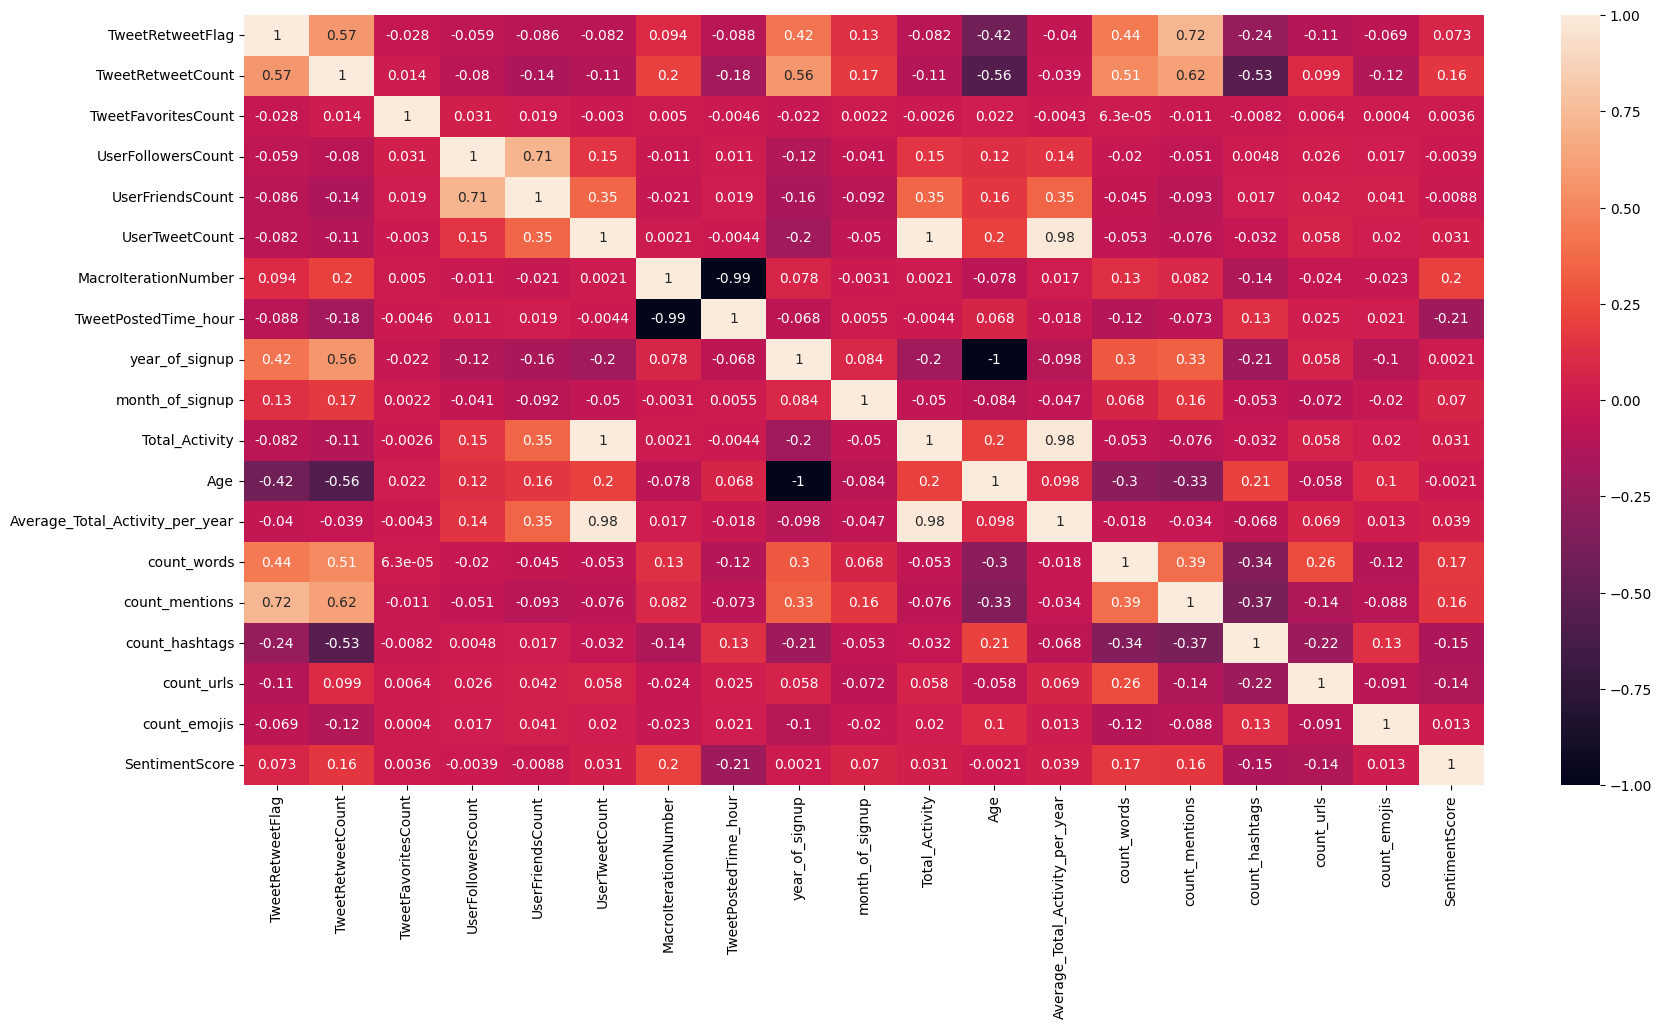

In [200]:
# heat map

plt.figure(figsize=(20,10))
sns.heatmap(df_final.corr(),annot=True)

In [201]:
# With respect to target variable

plt.figure(figsize=(10,5))
corr = df_final.corr()[1:2]

<Figure size 1000x500 with 0 Axes>

<Axes: >

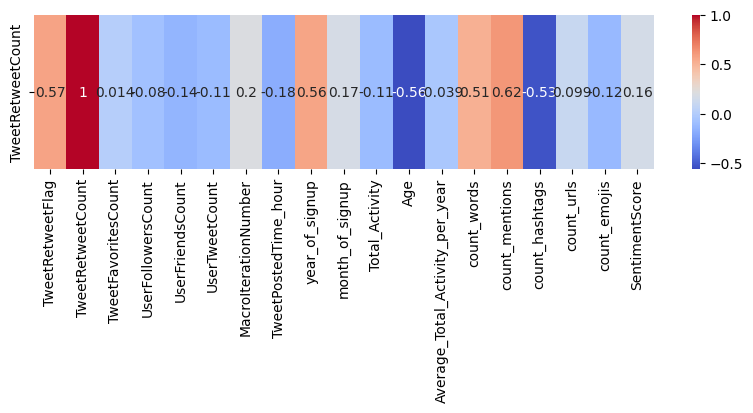

In [202]:
plt.figure(figsize=(10,2))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [248]:
##1. Correlation threshold function

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr


In [249]:
corr_feature = correlation(df_final,0.5)
corr_feature

{'Age',
 'Average_Total_Activity_per_year',
 'Total_Activity',
 'TweetPostedTime_hour',
 'TweetRetweetCount',
 'UserFriendsCount',
 'count_hashtags',
 'count_mentions',
 'count_words',
 'year_of_signup'}

In [250]:
# 2. VIF


from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataset.columns
    vif_data["VIF"] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    return vif_data

# Assuming your dataset is stored in a variable named 'data'
vif_result = calculate_vif(df_final)
print(vif_result)



# if vif is 0 then there is no correlation, if vif 1 to 5 modrately correlated , if vif 5-10 correlated , more than that highly correlated


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                            Feature         VIF
0                  TweetRetweetFlag    2.476782
1                 TweetRetweetCount    2.964204
2               TweetFavoritesCount         inf
3                UserFollowersCount    2.103421
4                  UserFriendsCount    2.380668
5                    UserTweetCount         inf
6              MacroIterationNumber   70.017723
7              TweetPostedTime_hour   69.777697
8                    year_of_signup  875.151026
9                   month_of_signup    1.054027
10                   Total_Activity         inf
11                              Age   24.574454
12  Average_Total_Activity_per_year   31.266079
13                      count_words    1.611903
14                   count_mentions    2.615287
15                   count_hashtags    1.553780
16                       count_urls    1.312735
17                     count_emojis    1.033211
18                   SentimentScore    1.159747


In [251]:
new_features = ['Age',
 'Average_Total_Activity_per_year',
 'Total_Activity',
 'TweetPostedTime_hour',
  'UserFriendsCount',
 'count_hashtags',
 'count_mentions',
 'count_words',
 'year_of_signup']


In [252]:
df_final2 = df_final[new_features]

In [253]:
from sklearn.model_selection import train_test_split


x = df_final2
y = df_final["TweetRetweetCount"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [254]:
import time
# models

start = time.time()
log_reg = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

def pred_model(model):

        model.fit(x_train, y_train)
        print('*'*16,f'{model}', '*'*16)

        print("Model Name :-",model)

        y_pred_train = model.predict(x_train)
        train_accuracy = r2_score(y_train, y_pred_train)

        print("Training accuracy:", round(train_accuracy, 3))
        y_pred_test = model.predict(x_test)
        test_accuracy = r2_score(y_test, y_pred_test)
        print("Testing accuracy: ", round(train_accuracy, 3))



        end = time.time()

        print("Time taken to run the cell :-",end - start)


In [210]:
log_reg = LinearRegression()
pred_model(log_reg)

**************** LinearRegression() ****************
Model Name :- LinearRegression()
Training accuracy: 0.653
Testing accuracy:  0.653
Time taken to run the cell :- 0.07693004608154297


In [225]:
# Add Validation



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# Define the model
model = RandomForestRegressor()

# Perform grid search to find the best hyperparameters
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the model on the validation set
val_predictions = best_model.predict(x_val_scaled)
val_accuracy = r2_score(y_val, val_predictions)
print("Validation accuracy:", val_accuracy)

# Evaluate the model on the test set
test_predictions = best_model.predict(x_test_scaled)
test_accuracy = r2_score(y_test, test_predictions)
print("Testing accuracy:", test_accuracy)


In [225]:
####### Flask / Test




In [257]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42368 entries, 0 to 42367
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   TweetRetweetFlag                 42368 non-null  int64  
 1   TweetRetweetCount                42368 non-null  int64  
 2   TweetFavoritesCount              42368 non-null  int64  
 3   UserFollowersCount               42368 non-null  int64  
 4   UserFriendsCount                 42368 non-null  int64  
 5   UserTweetCount                   42368 non-null  int64  
 6   MacroIterationNumber             42368 non-null  int64  
 7   TweetPostedTime_hour             42368 non-null  int64  
 8   year_of_signup                   42368 non-null  int64  
 9   month_of_signup                  42368 non-null  int64  
 10  Total_Activity                   42368 non-null  int64  
 11  Age                              42368 non-null  int64  
 12  Average_Total_Acti

In [258]:
df_final.columns

Index(['TweetRetweetFlag', 'TweetRetweetCount', 'TweetFavoritesCount',
       'UserFollowersCount', 'UserFriendsCount', 'UserTweetCount',
       'MacroIterationNumber', 'TweetPostedTime_hour', 'year_of_signup',
       'month_of_signup', 'Total_Activity', 'Age',
       'Average_Total_Activity_per_year', 'count_words', 'count_mentions',
       'count_hashtags', 'count_urls', 'count_emojis', 'SentimentScore'],
      dtype='object')